<a href="https://colab.research.google.com/github/AryakBhattacharya/Image-Enhancer/blob/main/Image_Enhancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
try:
    import google.colab
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    IN_COLAB = True
except:
    IN_COLAB = False

Mounted at /content/drive


In [12]:
import os

if IN_COLAB:
    root_path = '/content/drive/MyDrive/Colab Notebooks/Image Enhancing'
else:
    root_path = 'Enter local path'

os.chdir(root_path)

Saving ezgif-frame-072.jpg to ezgif-frame-072 (10).jpg
Original Image:


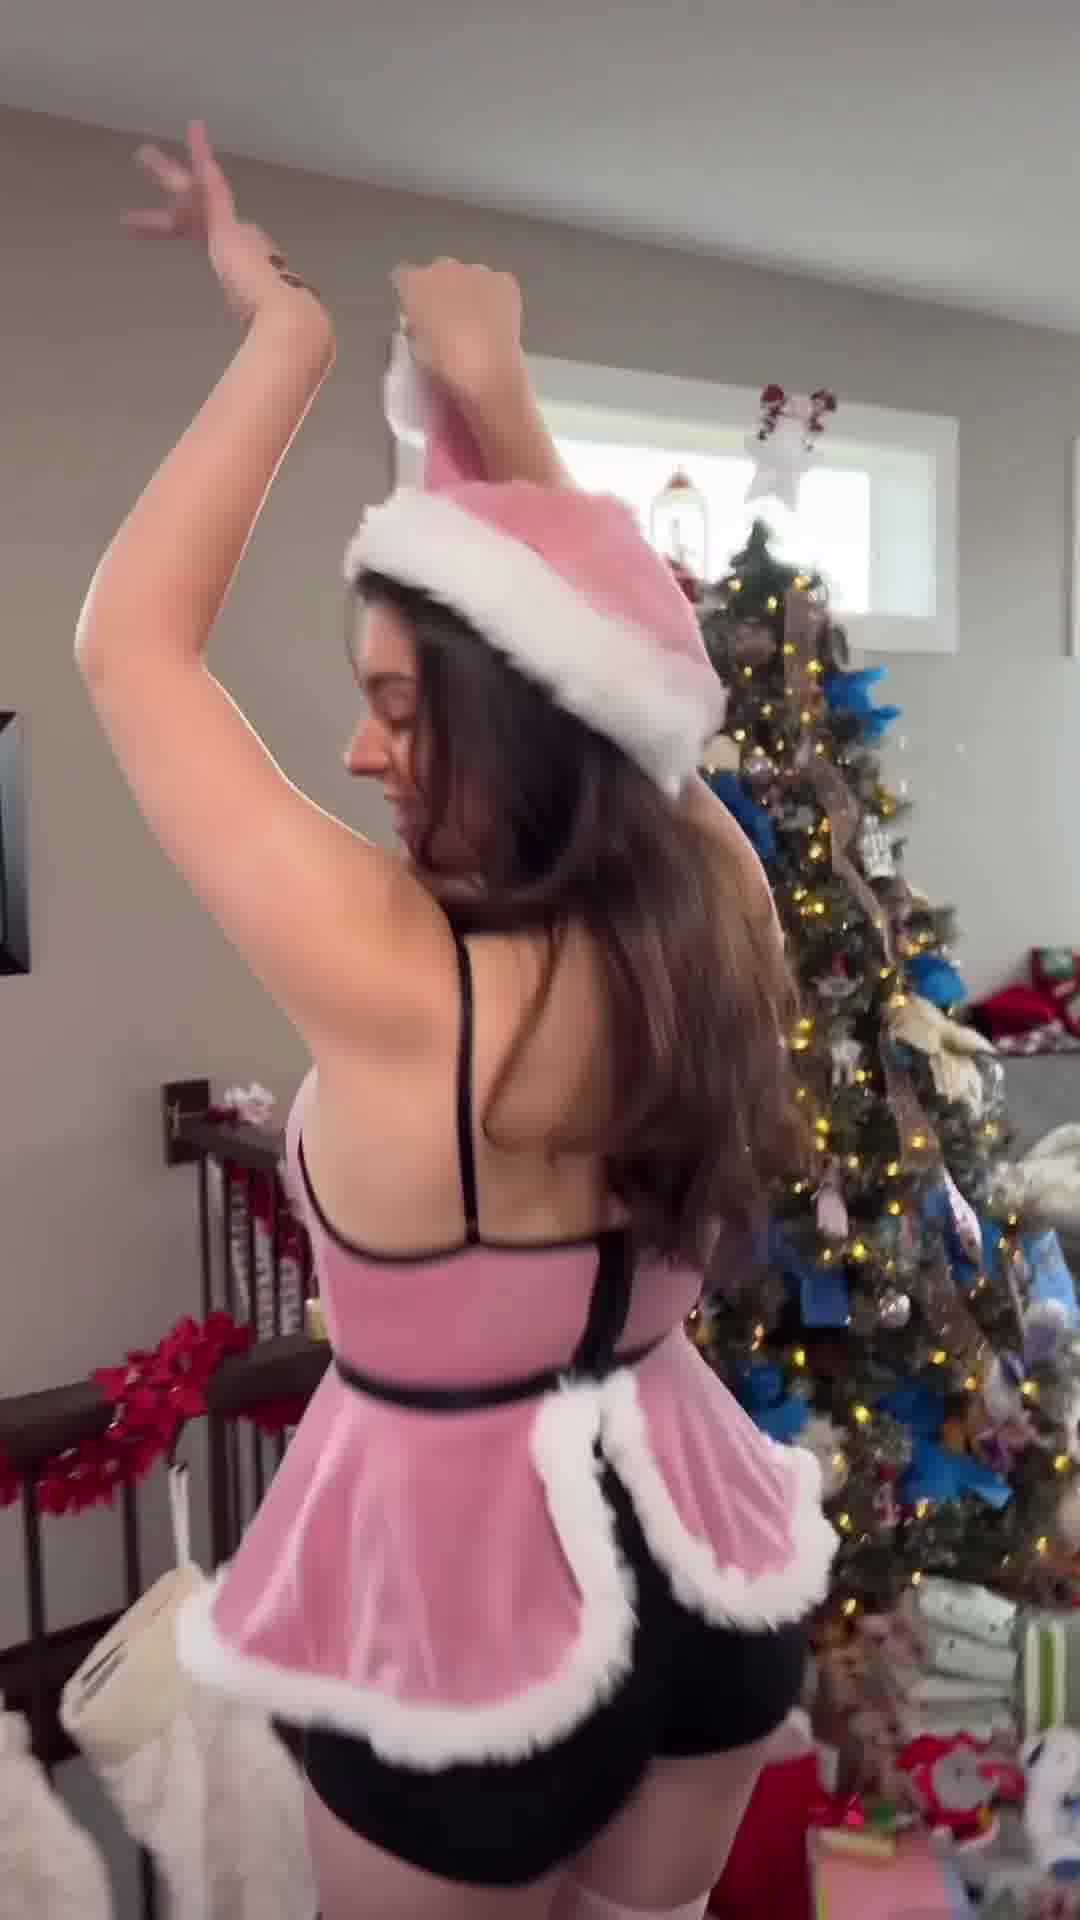

Enhanced Image:


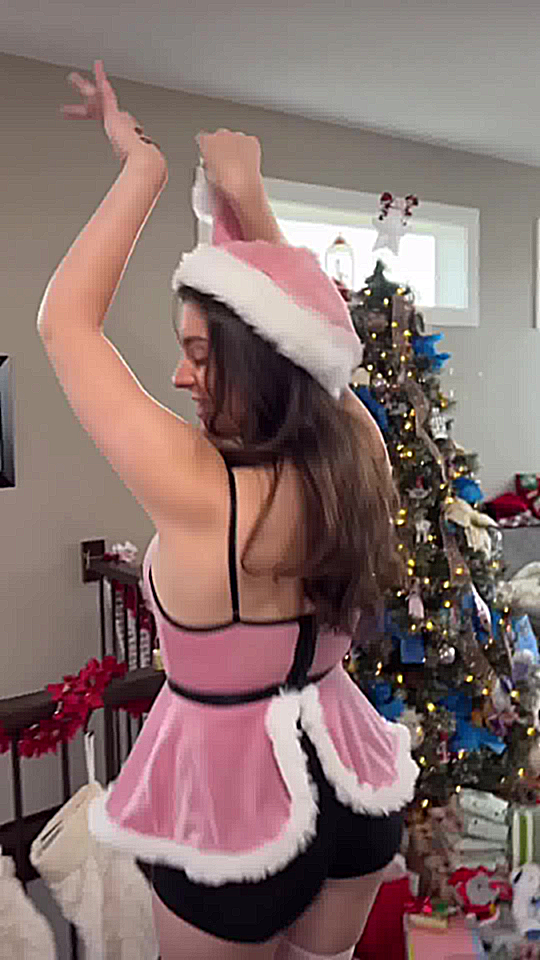

Original image saved to: /content/drive/MyDrive/Colab Notebooks/Image Enhancing/Enhanced_Images/ezgif-frame-072 (10)_original.png
Enhanced image saved to: /content/drive/MyDrive/Colab Notebooks/Image Enhancing/Enhanced_Images/ezgif-frame-072 (10)_enhanced.png


In [26]:
# # Install necessary libraries
# !pip install opencv-python
# !pip install Pillow

import cv2
import numpy as np
from PIL import Image, ImageFilter
from io import BytesIO
from IPython.display import display, HTML, Image as IPImage
from google.colab import files, drive

# # Connect to Google Drive
# drive.mount('/content/drive')

# # Set the root path for saving images
# root_path = '/content/drive/MyDrive/Colab Notebooks/Image Enhancing'

# Create a new folder for saving images if it doesn't exist
output_folder = 'Enhanced_Images'
output_path = f'{root_path}/{output_folder}'
!mkdir -p "$output_path"

# Function to upload an image file
def upload_image():
    uploaded = files.upload()
    if len(uploaded) == 0:
        return None
    image_path = list(uploaded.keys())[0]
    return image_path

# Function to enhance image quality without resizing
def enhance_image(input_image_path):
    # Read the image
    img = cv2.imread(input_image_path)

    # Increase deblurring effect (adjust the kernel size)
    img = cv2.GaussianBlur(img, (11, 11), 0)

    # Increase depixelation effect (adjust the interpolation method)
    img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

    # Add sharpness and clarity
    img = cv2.filter2D(img, -1, kernel=np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

    return img

# Function to display the enhanced image
def display_image(image):
    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    img_byte_array = BytesIO()
    img_pil.save(img_byte_array, format='PNG')
    display(IPImage(data=img_byte_array.getvalue(), format='png'))

# Function to save images
def save_images(original_image, enhanced_image, output_path, image_name):
    original_path = f'{output_path}/{image_name}_original.png'
    enhanced_path = f'{output_path}/{image_name}_enhanced.png'

    cv2.imwrite(original_path, original_image)
    cv2.imwrite(enhanced_path, enhanced_image)

    print(f"Original image saved to: {original_path}")
    print(f"Enhanced image saved to: {enhanced_path}")

# Main program
# Upload image
image_path = upload_image()

if image_path:
    # Enhance the image without resizing
    enhanced_image = enhance_image(image_path)

    # Display the original and enhanced images
    print("Original Image:")
    display(Image.open(image_path))

    print("Enhanced Image:")
    display_image(enhanced_image)

    # Save images to Google Drive
    image_name = image_path.split('/')[-1].split('.')[0]
    save_images(cv2.imread(image_path), enhanced_image, output_path, image_name)
